# Regressão Linear Simples

In [3]:
#!pip install plotly --upgrade

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt

In [44]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split

## Base plano saúde

In [7]:
base_plano_saude = pd.read_csv('plano_saude.csv')
print(base_plano_saude.shape)
base_plano_saude.head()

(10, 2)


,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [9]:
X_saude = base_plano_saude.iloc[:,0].values
y_saude = base_plano_saude.iloc[:,1].values
X_saude.shape, y_saude.shape

((10,), (10,))

In [10]:
np.corrcoef(X_saude, y_saude)  # correlação perfeita, pois valores são iguais

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

Correlação forte indica que regressão linear pode funcionar!

In [11]:
X_saude = X_saude.reshape(-1, 1)
y_saude = y_saude.reshape(-1, 1)
X_saude.shape, y_saude.shape

((10, 1), (10, 1))

In [13]:
regressor_saude = LinearRegression()
regressor_saude.fit(X_saude, y_saude)

LinearRegression()

In [15]:
# b0 
regressor_saude.intercept_

array([-558.94909091])

In [16]:
# b1
regressor_saude.coef_

array([[61.86787879]])

In [18]:
previsoes = regressor_saude.predict(X_saude)
previsoes.shape

(10, 1)

In [24]:
grafico = px.scatter(x = X_saude.ravel(), y = y_saude.ravel())
grafico.add_scatter(x = X_saude.ravel(), y = previsoes.ravel())
grafico.show()

In [25]:
regressor_saude.score(X_saude, y_saude)

0.8666112727879173

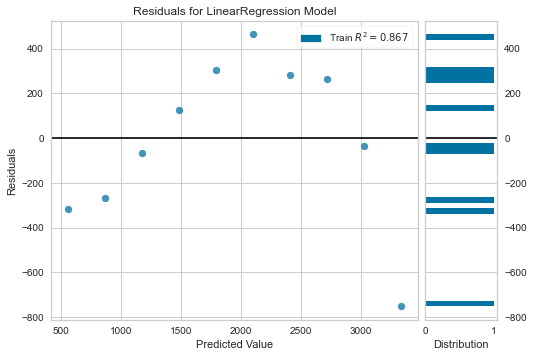

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizador = ResidualsPlot(regressor_saude)
visualizador.fit(X_saude, y_saude)
visualizador.poof()

## Base Preço das casas

In [32]:
base_preco_casas = pd.read_csv('house_prices.csv')
print(base_preco_casas.shape)
base_preco_casas.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
base_preco_casas.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613,NaN,NaN,NaN,4.5803e+09,2.87657e+09,1.0001e+06,2.12305e+09,3.90493e+09,7.3089e+09,9.9e+09
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613,NaN,NaN,NaN,540088,367127,75000,321950,450000,645000,7.7e+06
bedrooms,21613,NaN,NaN,NaN,3.37084,0.930062,0,3,3,4,33
bathrooms,21613,NaN,NaN,NaN,2.11476,0.770163,0,1.75,2.25,2.5,8
sqft_living,21613,NaN,NaN,NaN,2079.9,918.441,290,1427,1910,2550,13540
sqft_lot,21613,NaN,NaN,NaN,15107,41420.5,520,5040,7618,10688,1.65136e+06
floors,21613,NaN,NaN,NaN,1.49431,0.539989,1,1,1.5,2,3.5
waterfront,21613,NaN,NaN,NaN,0.00754176,0.0865172,0,0,0,0,1
view,21613,NaN,NaN,NaN,0.234303,0.766318,0,0,0,0,4


In [35]:
base_preco_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
base_preco_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<AxesSubplot:>

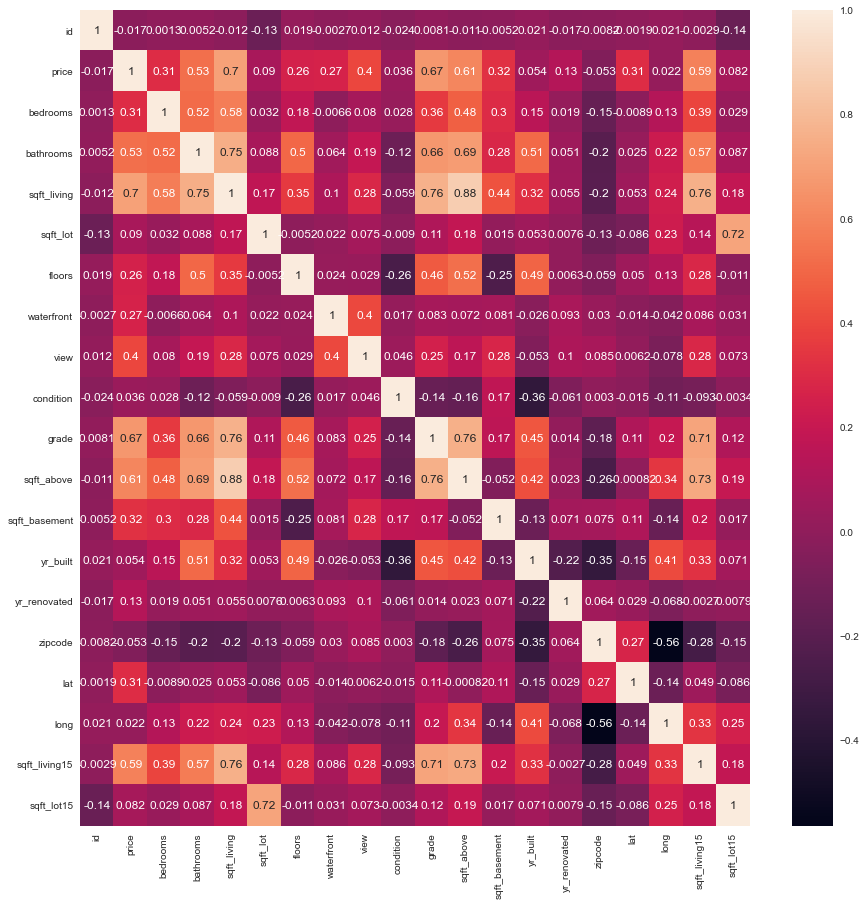

In [40]:
figura = plt.figure(figsize=[15,15])
sns.heatmap(base_preco_casas.corr(), annot=True)

In [43]:
X_casas = base_preco_casas.iloc[:, 5:6].values
y_casas = base_preco_casas.iloc[:, 2].values
X_casas.shape, y_casas.shape

((21613, 1), (21613,))

In [47]:
X_casas_train, X_casas_test, y_casas_train, y_casas_test = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)
print(f'Treino: X-->{X_casas_train.shape} e y-->{y_casas_train.shape}')
print(f'Teste:  X-->{X_casas_test.shape}  e y-->{y_casas_test.shape}')

Treino: X-->(15129, 1) e y-->(15129,)
Teste:  X-->(6484, 1)  e y-->(6484,)


In [48]:
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_train, y_casas_train)

LinearRegression()

In [49]:
regressor_simples_casas.intercept_, regressor_simples_casas.coef_

(-37893.59850106691, array([278.32860644]))

In [50]:
regressor_simples_casas.score(X_casas_train, y_casas_train)

0.49453356717789776

In [51]:
regressor_simples_casas.score(X_casas_test, y_casas_test)

0.48889929019453016

Muito ruim dessa forma!

In [54]:
previsoes = regressor_simples_casas.predict(X_casas_train)
previsoes.shape

(15129,)

In [60]:
grafico = px.scatter(x=X_casas_train.ravel(), y=previsoes)
grafico.show()

In [67]:
grafico1 = px.scatter(x=X_casas_train.ravel(), y=y_casas_train.ravel())
grafico2 = px.line(x=X_casas_train.ravel(), y=previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3